## Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Dataset

In [5]:
df = pd.read_csv(filepath_or_buffer = "../data/CreditCard.csv",
                 index_col=0)

## Business Case Definition

#### The business problem we want to solve here: to find the effect of each of the variables separately on the "Credit card approval", and how collectively they are affecting the same response variable, so the bank could choose the most important variables out of these for running their quick customer diagnostics before approving a credit card.

## Feature Discription

* card : Factor. Was the application for a credit card accepted?
* reports : Number of major derogatory reports
* age : Age in years plus twelfths of a year.
* income : Yearly income (in USD 10,000).
* share : Ratio of monthly credit card expenditure to yearly income.
* expenditure : Average monthly credit card expenditure
* owner : Factor. Does the individual own their home?
* selfemp : Factor. Is the individual self-employed?
* dependents : Number of dependents.
* months : Months living at current address.
* majorcards : Number of major credit cards held.
* active : Number of active credit accounts.

## Basic Analysis

In [6]:
df.describe().head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000


### Overview of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 134.0+ KB


In [8]:
df.isna().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

**The Following Inferences can be made by basic overview of the data**
1. There are three categorical features
2. There are no null values in the dataset
3. Target variable is 'Card'

# Univariate Analysis

## Numerical Variables

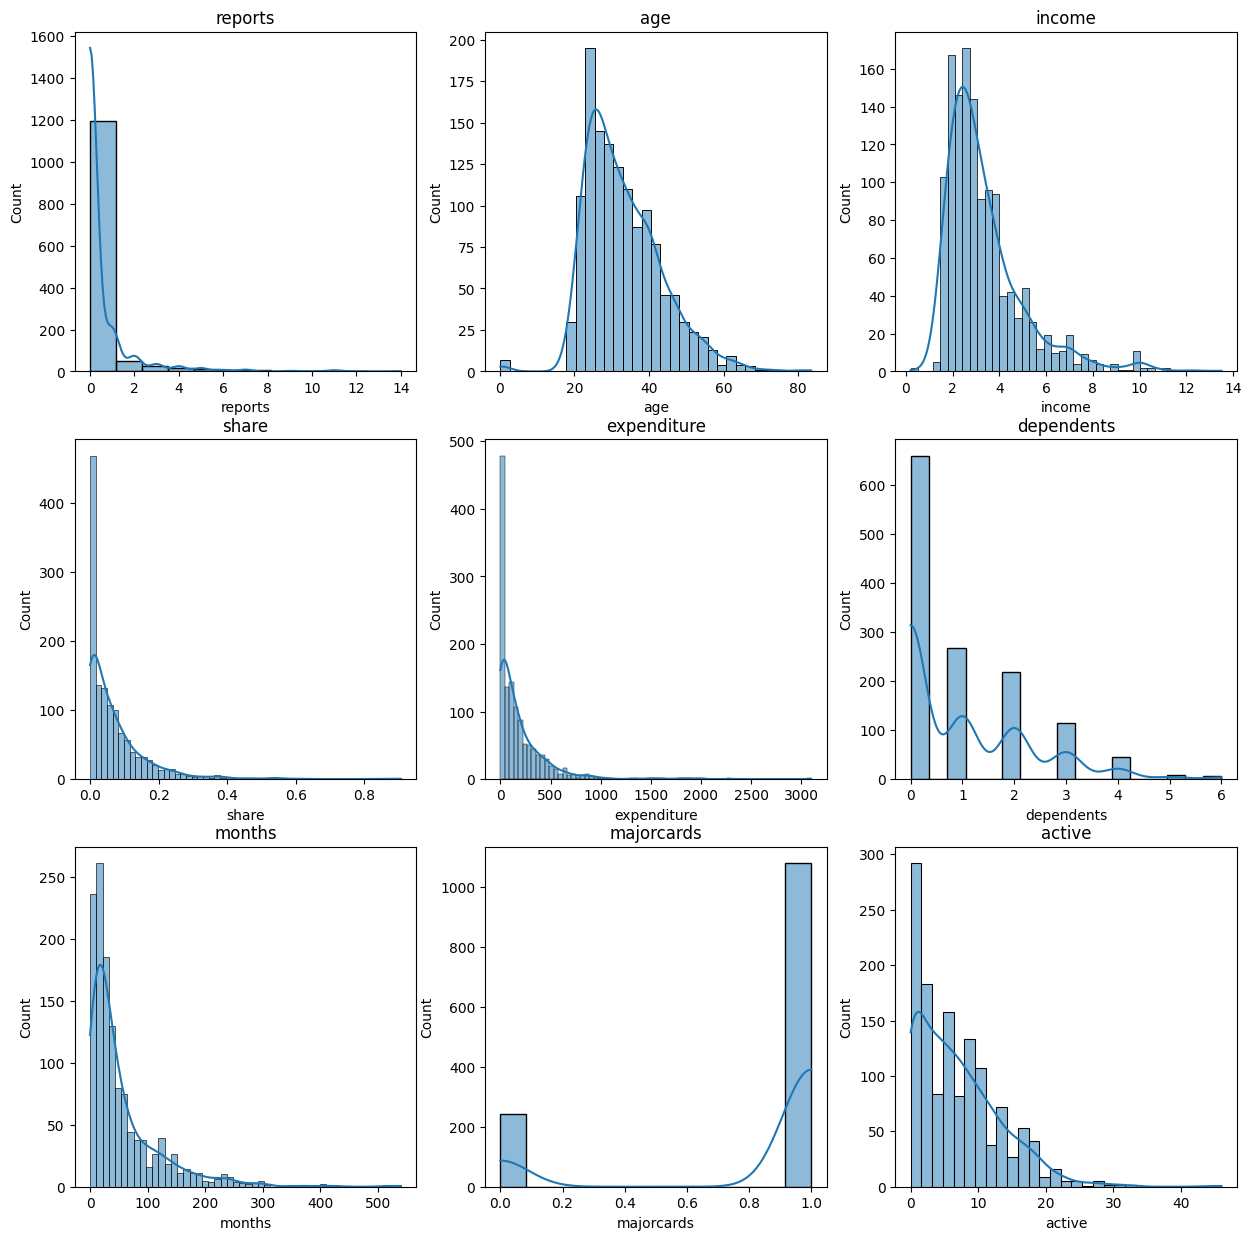

In [22]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

fig , axes = plt.subplots(3,3,figsize=[15,15])

for i,col in enumerate(num):
    sns.histplot(df[col],kde=True,ax=axes[i//3,i%3])
    # axes[i//3,i%3].hist(df[col],bins=20,density=True)
    axes[i//3,i%3].set_title(col)

plt.show()

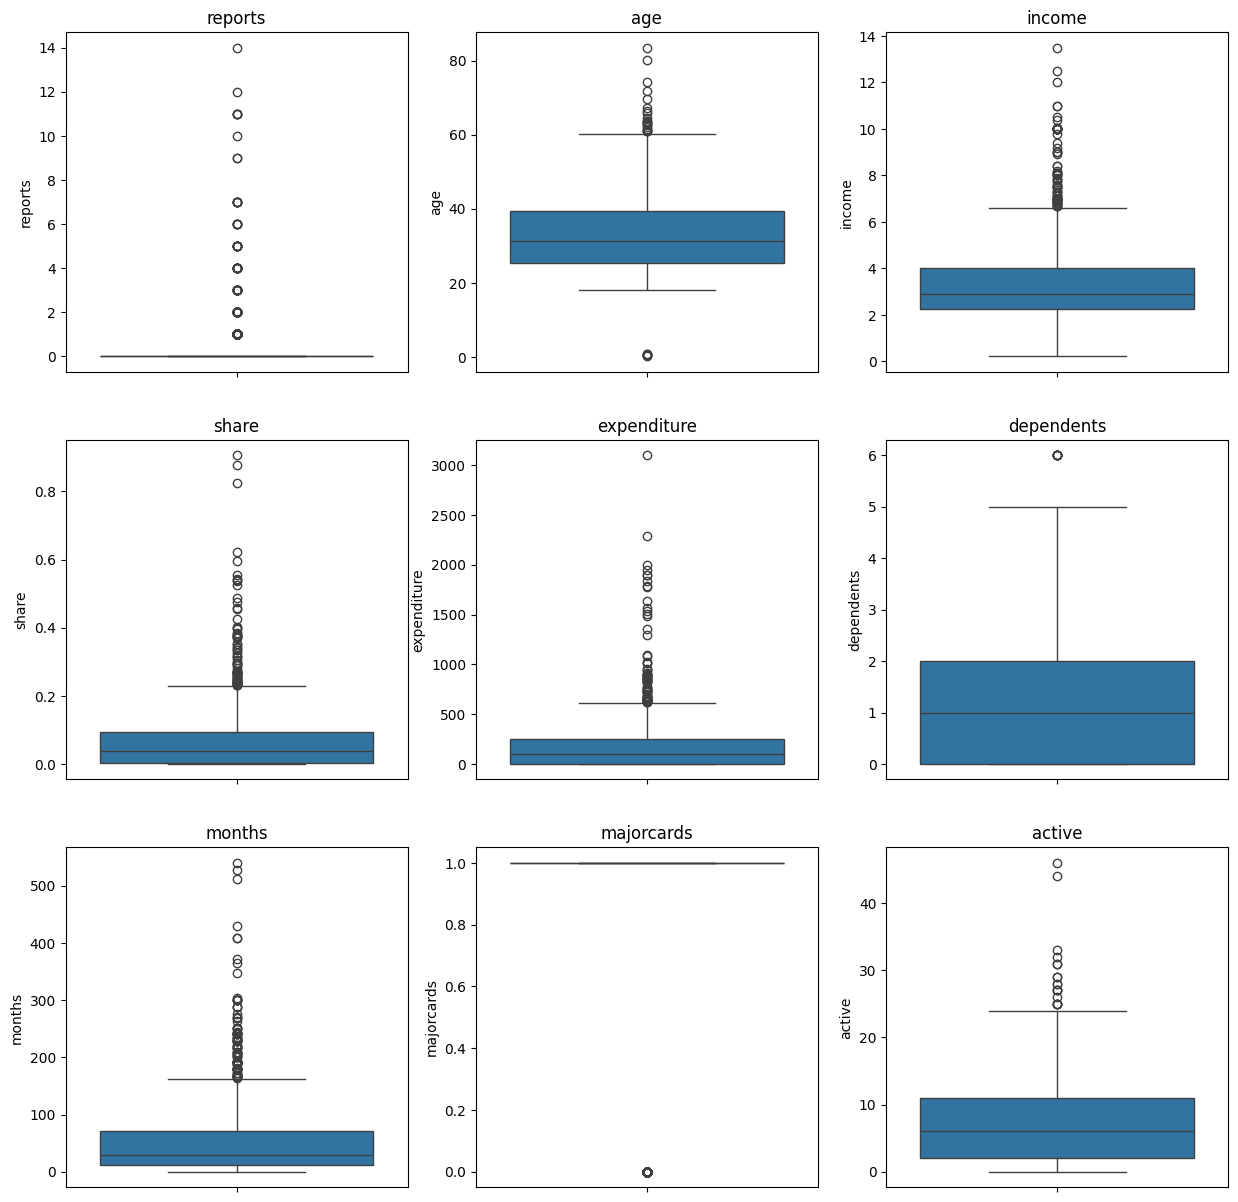

In [28]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

fig , axes = plt.subplots(3,3,figsize=[15,15])

for i,col in enumerate(num):
    sns.boxplot(df[col],fill=True,ax=axes[i//3,i%3])
    # axes[i//3,i%3].hist(df[col],bins=20,density=True)
    axes[i//3,i%3].set_title(col)

plt.show()

In [44]:
df.skew(numeric_only=True)

reports        4.884221
age            0.841428
income         1.928085
share          3.167606
expenditure    3.720321
dependents     1.234275
months         2.570304
majorcards    -1.644000
active         1.213365
dtype: float64

In [45]:
df.kurt(numeric_only=True)

reports        30.556681
age             1.472542
income          4.933327
share          16.253759
expenditure    22.281899
dependents      1.092424
months          9.478653
majorcards      0.703802
active          2.358621
dtype: float64

* **Reports** - Maximum number of people have 0 deregatory reports but there are many who have more than a few. The distribution is positively skewed and has heavy tails.
* **Age** - Most of the applicants are b/w 20-40 years and there are more ouliers in higher range. The distribution is positively skewed and is light tailed
* **Income** - Most of the applicants earn 20,000 to 40,000 dollars but there are some high earning individuals. The disribution is positively skewed and has light tails
* **Share** - Most ratios are close to zero which indicates people spend very less compared to how much they earn, but there are some outliers in the upper range. The distribution is positively skewed and is heavy tailed.
* **Expenditure** - Most people don't spend more than 500 dollars though there are many outliers. The distribution is positively skewed and heavy tailed.
* **Dependents** - Most people have 1-2 dependents but there are outliers. The distribution is positively skewed and light tailed
* **Months** - Most people have not lived more than 100 hours at their ccurrent address but there are many that have ,ived at their current address for many months.
* **Majorcards** - Most people have 1 major credit cards but those who don't is not insignificant. Skewness is negative and is lightailed
* **Active** - Most people have less than 10 active credit accounts but some outliers indicate more than 30. The distribution is positively skewed and has light tails.

## Categorical Variables

### Card The target variable

card
yes    1023
no      296
Name: count, dtype: int64


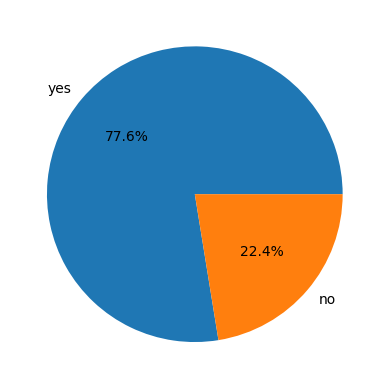

In [25]:
print(df['card'].value_counts())
plt.pie(df['card'].value_counts().values,labels=df['card'].value_counts().keys(),autopct="%1.1f%%")
plt.show()

**There are a lot more peope whose application was accepted**

### Other categorical variables

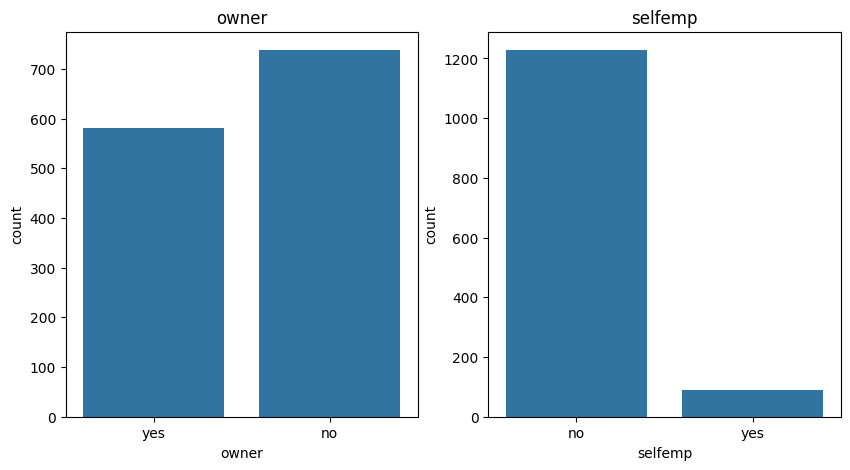

In [43]:
cat = ['owner','selfemp']

fig , axes = plt.subplots(1,2,figsize=[10,5])

for i,col in enumerate(cat):
    sns.countplot(df,x=col,ax=axes[i])
    axes[i].set_title(col)

plt.show()

* **Owner** - Most of the applicants do not own a house
* **Selfemp** - There are very few self employed applicants.

# Bivariate Analysis

## Against Target Variable

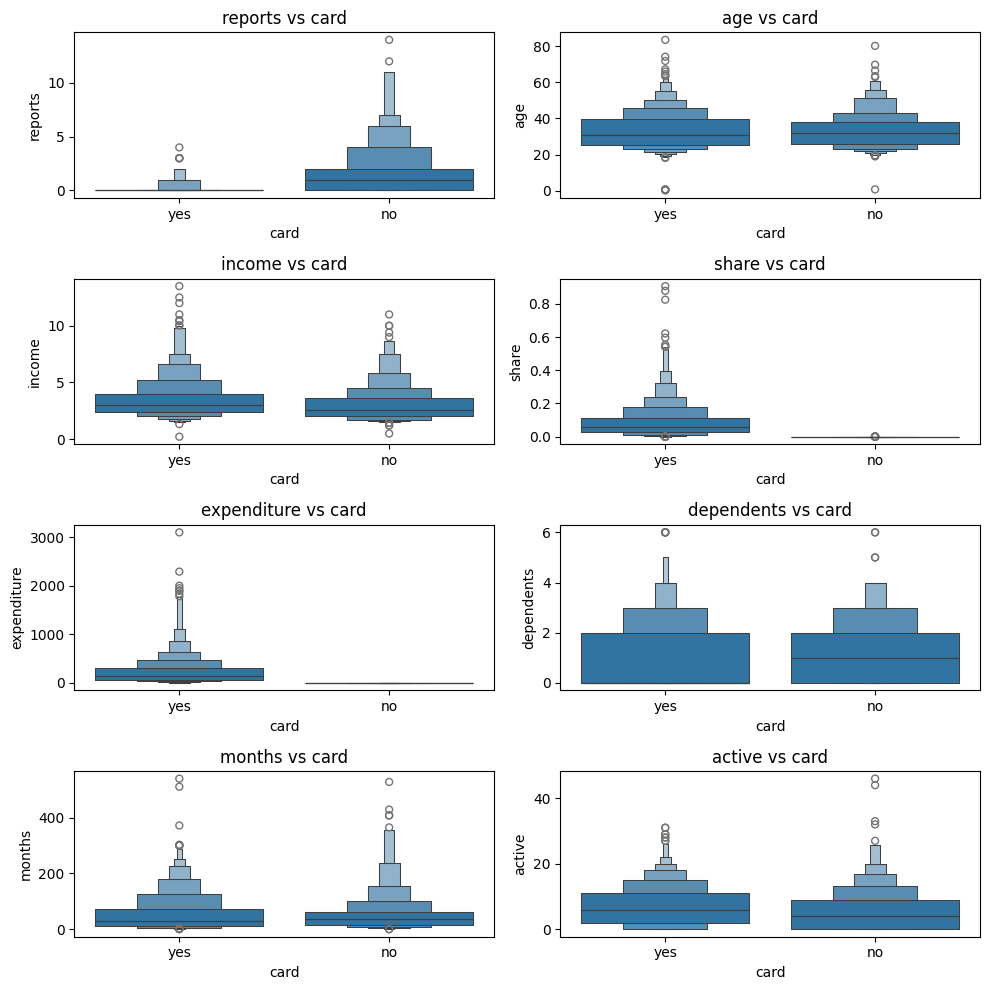

In [77]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'active']

fig , axes = plt.subplots(4,2,figsize=[10,10])

for i,col in enumerate(num):
    sns.boxenplot(df,x='card',y=col,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f"{col} vs card")
plt.tight_layout()
plt.show()

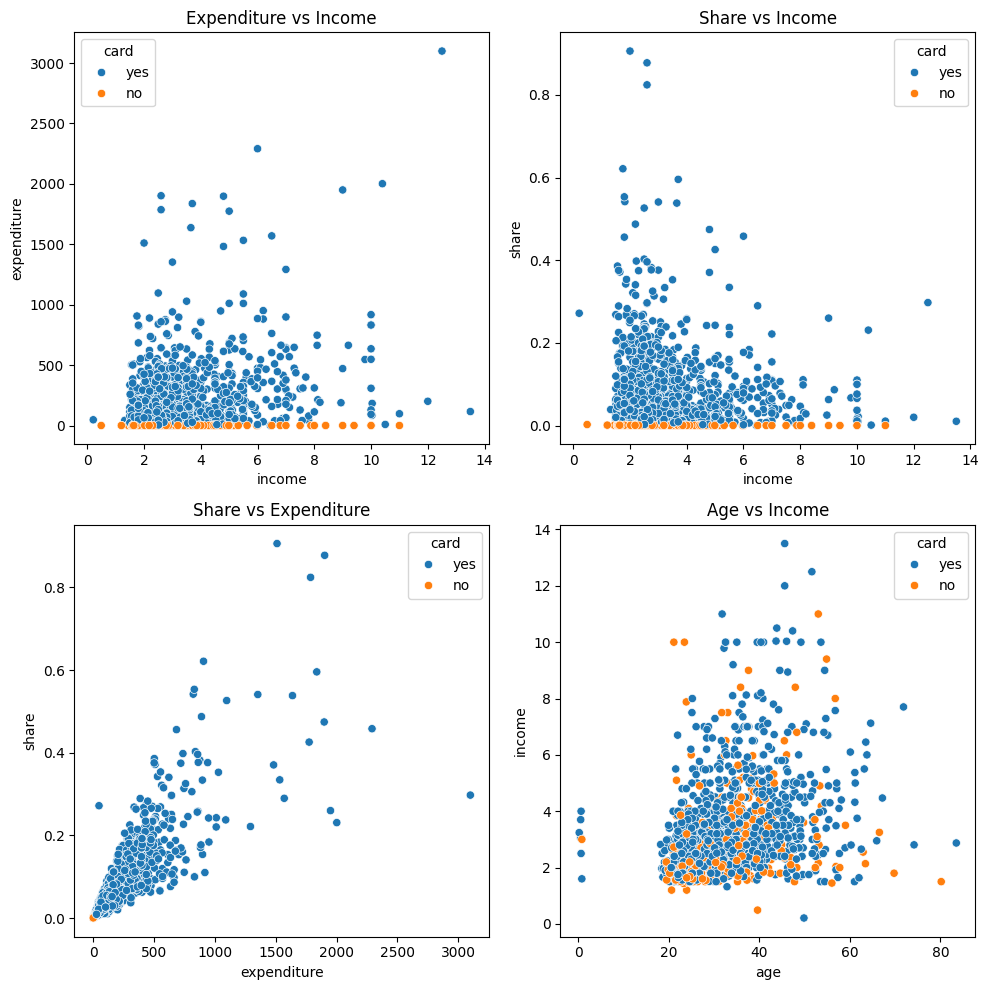

In [82]:
fig , axes = plt.subplots(2,2,figsize=[10,10])

sns.scatterplot(data=df,x='income',y='expenditure',hue='card',ax=axes[0,0])
axes[0,0].set_title("Expenditure vs Income")

sns.scatterplot(data=df,x='income',y='share',hue='card',ax=axes[0,1])
axes[0,1].set_title("Share vs Income")

sns.scatterplot(data=df,x='expenditure',y='share',hue='card',ax=axes[1,0])
axes[1,0].set_title("Share vs Expenditure")

sns.scatterplot(data=df,x='age',y='income',hue='card',ax=axes[1,1])
axes[1,1].set_title("Age vs Income")

plt.tight_layout()
plt.show()

In [80]:
from scipy.stats import chi2_contingency

tab_card_vs_owner = pd.crosstab(df['card'],df['owner'])
tab_card_vs_owner

owner,no,yes
card,,
no,206,90
yes,532,491


In [81]:
stat,p_val,dof,expected=chi2_contingency(tab_card_vs_owner)

stat,p_val,dof,expected

(28.11407333689662,
 1.1437115047558142e-07,
 1,
 array([[165.61637604, 130.38362396],
        [572.38362396, 450.61637604]]))

In [64]:
group1 = df[df['card']=='yes']['income']
group2 = df[df['card']=='no']['income']

stat.ttest_ind(group1,group2)

TtestResult(statistic=3.4377883877255977, pvalue=0.0006047776915757772, df=1317.0)

# Multivariate

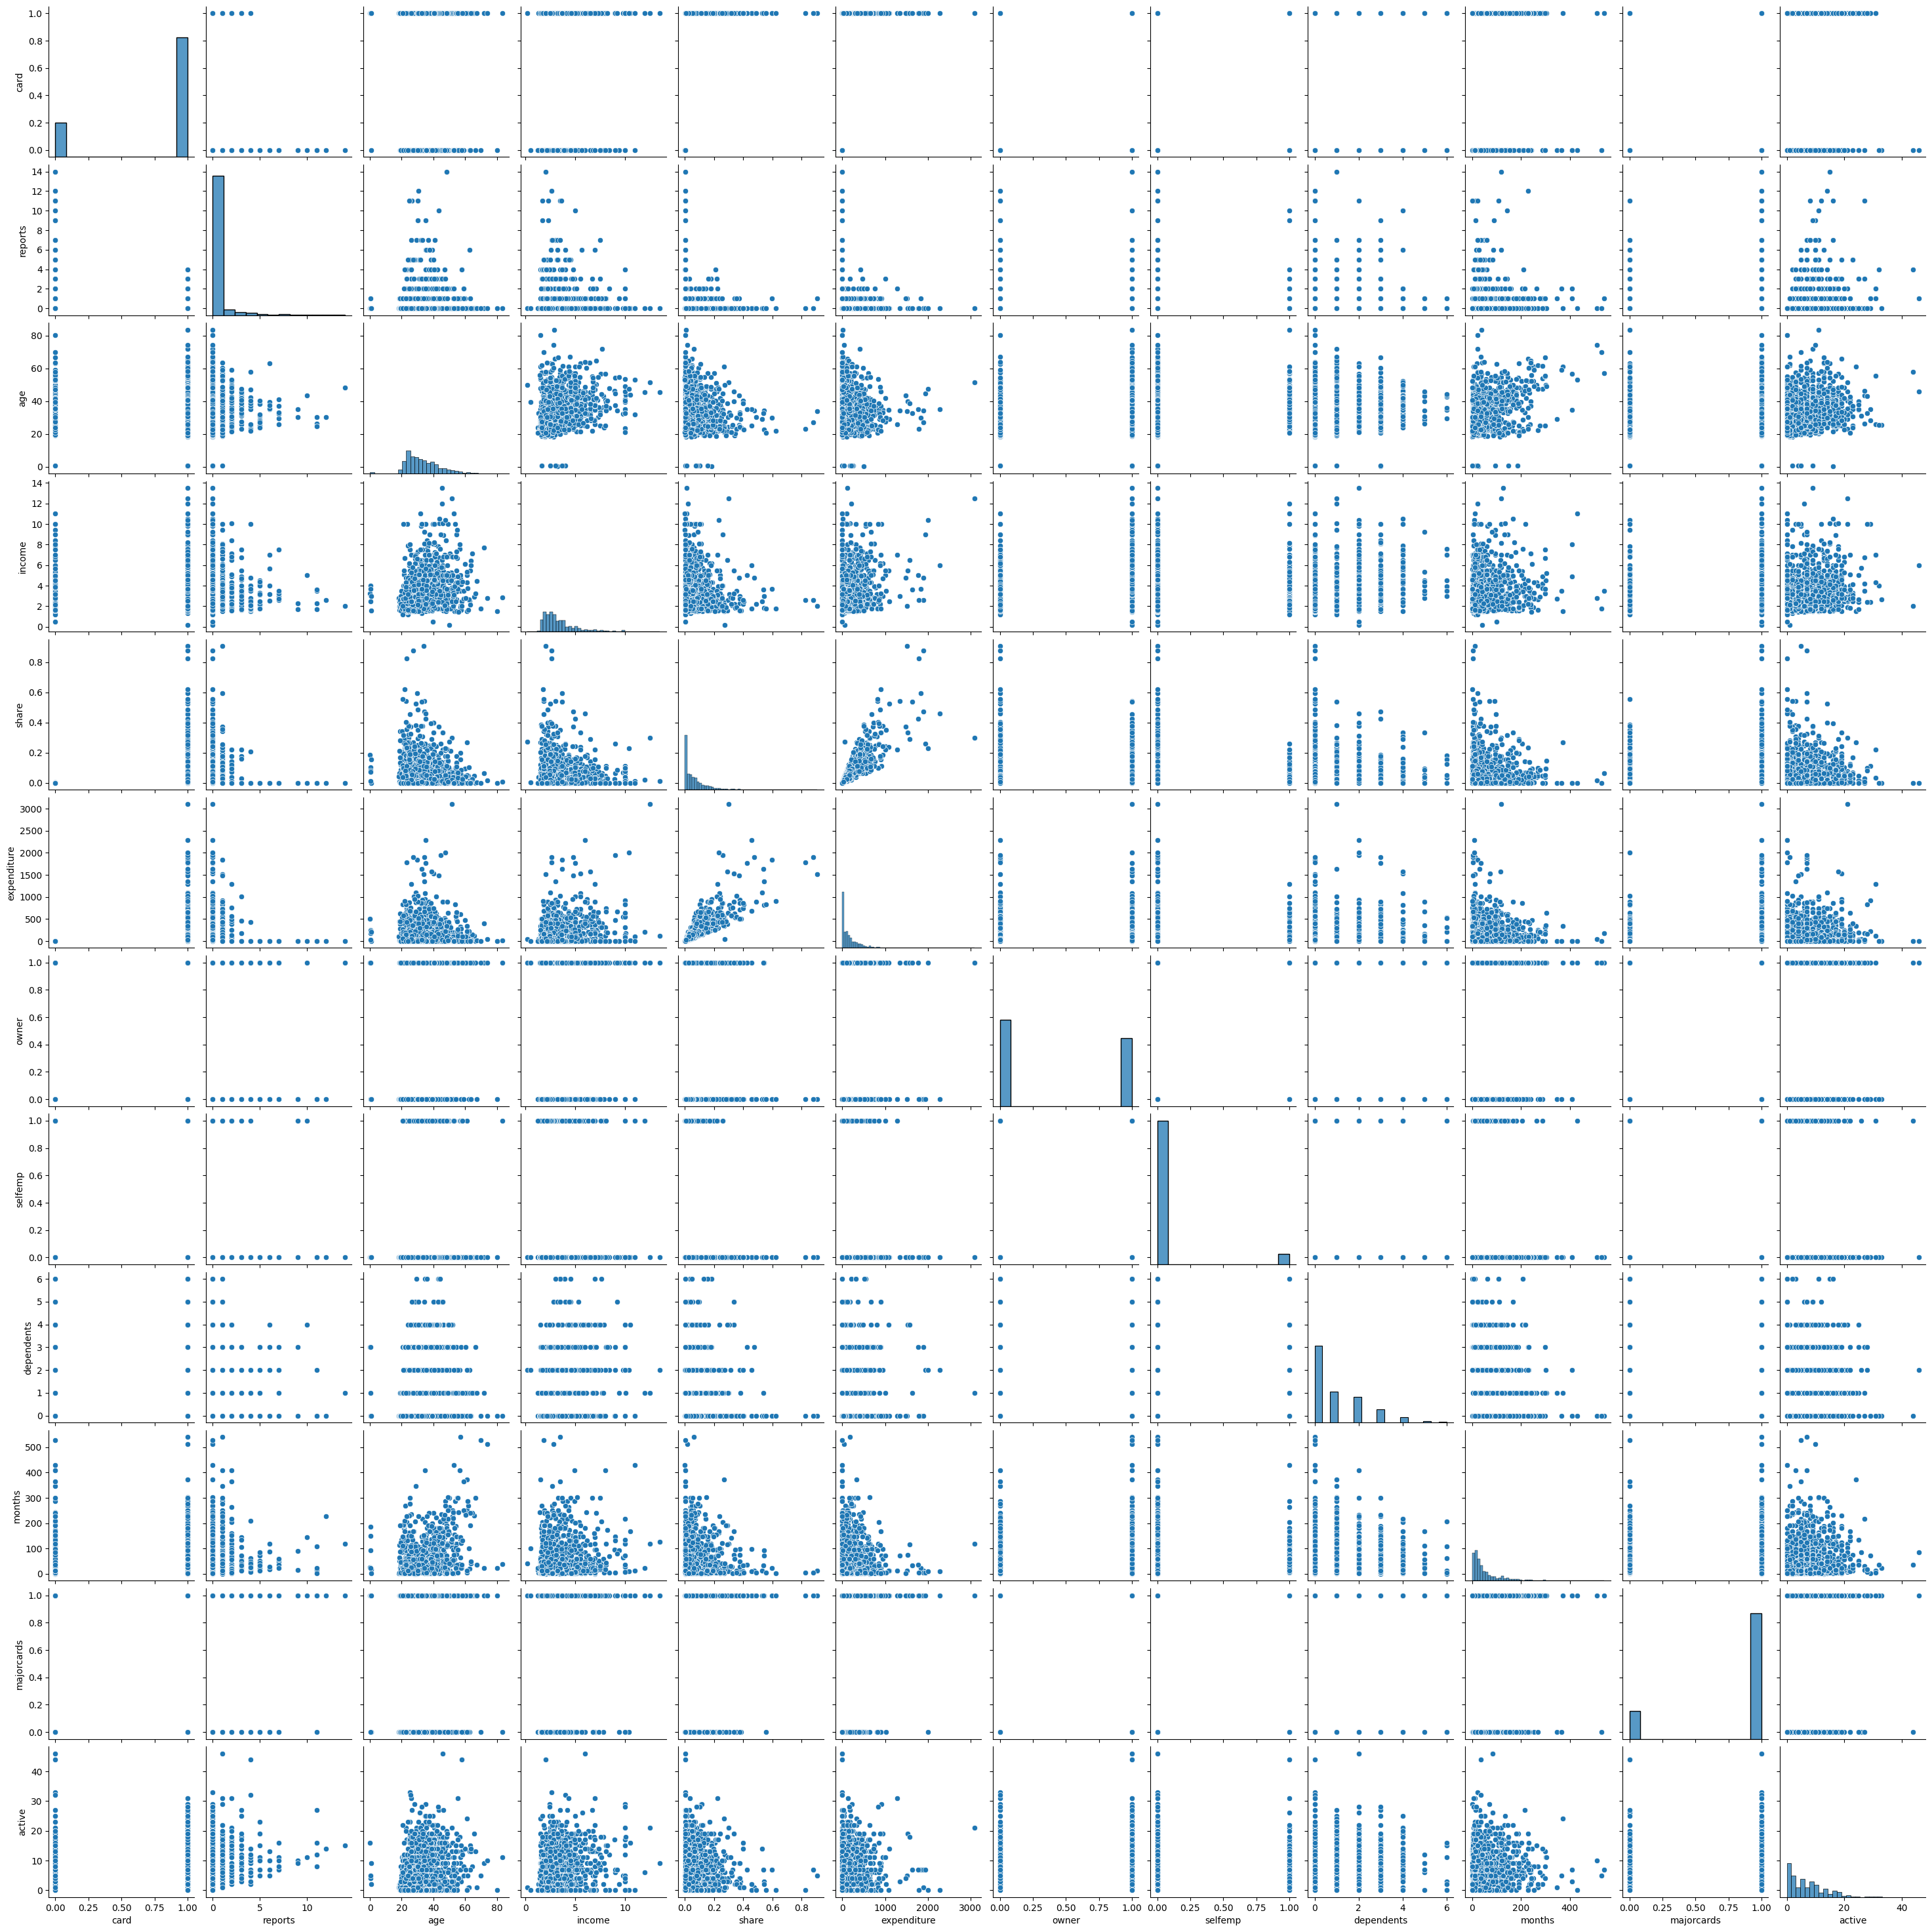

In [98]:
sns.pairplot(df)
plt.show()

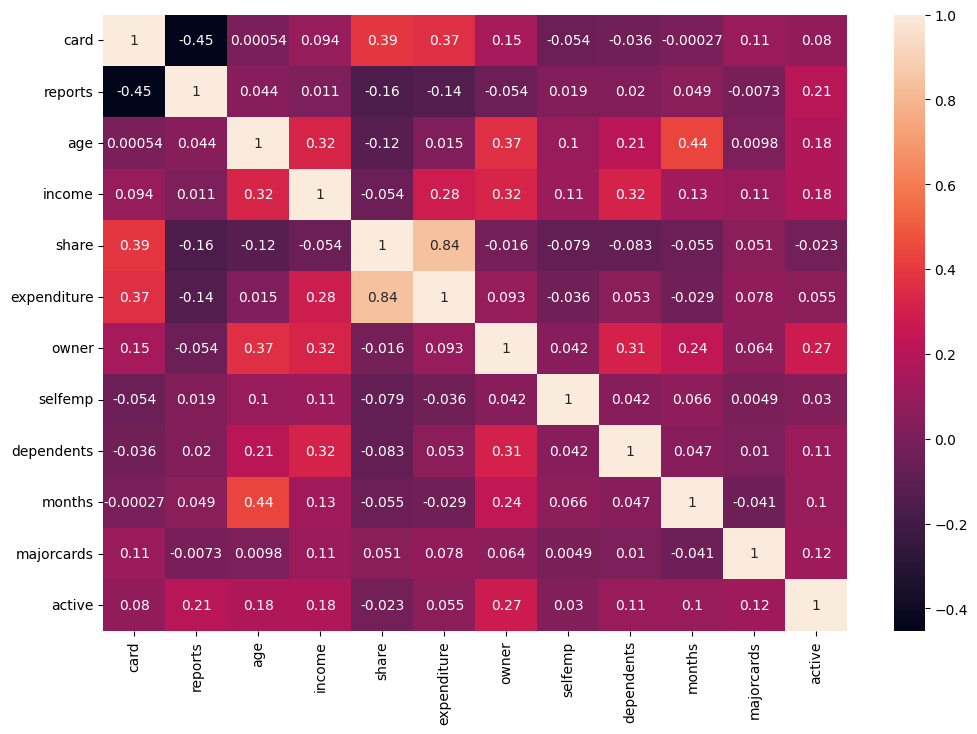

In [101]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

plt.figure(figsize=[12,8])
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

plt.show()

## PCA (Principal Component Analysis)

In [12]:
le = LabelEncoder()
cols = ['card','owner','selfemp']
df_enc = df
for i in cols:
    df_enc[i] = le.fit_transform(df[i])


In [13]:
scale=StandardScaler()

df_sca =pd.DataFrame(scale.fit_transform(df_enc),columns=df.columns)

In [16]:
df_dep = df_sca['card']
df_ind = df_sca.drop(labels='card',axis='columns')
pca = PCA(n_components=11)

x_pca = pca.fit_transform(df_ind)

pca.explained_variance_ratio_

array([0.20892775, 0.17655626, 0.10508225, 0.09768874, 0.08973779,
       0.0865658 , 0.07065312, 0.0599222 , 0.05002672, 0.04603798,
       0.0088014 ])

In [19]:
x_pca[:,0].shape

(1319,)

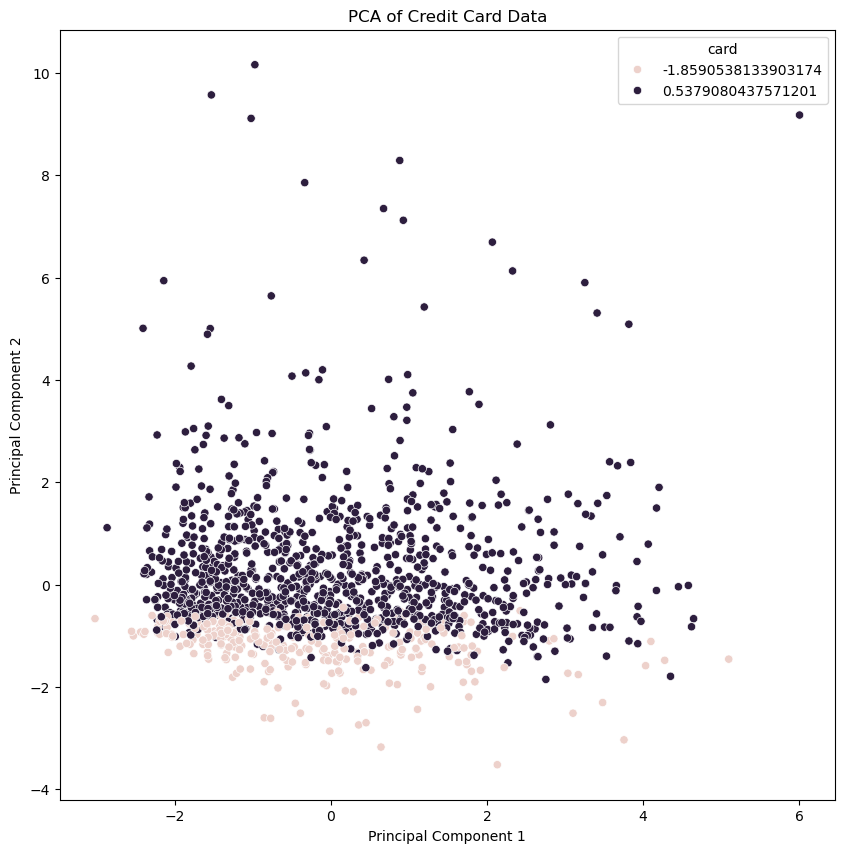

In [20]:
# Plot PCA
plt.figure(figsize=(10, 10))

sns.scatterplot(x   = x_pca[:, 0], 
                y   = x_pca[:, 1], 
                hue = df_dep)

plt.title('PCA of Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Cluster Analysis

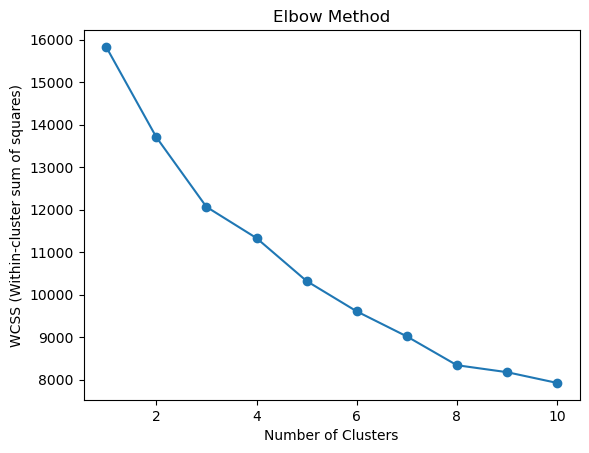

In [21]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_sca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

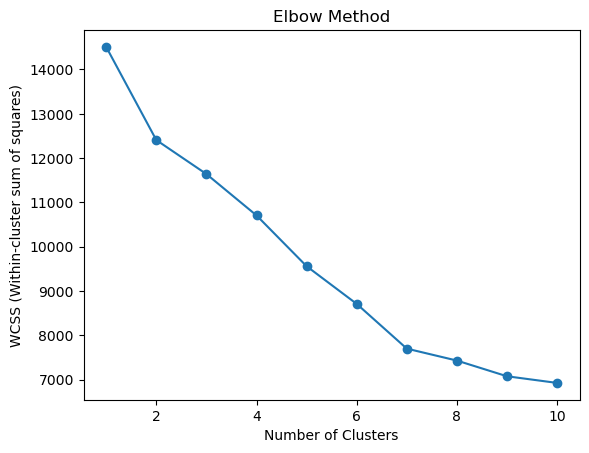

In [22]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_ind)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

For n_clusters = 2, the silhouette score is 0.1860463094251177
For n_clusters = 3, the silhouette score is 0.13528518043972038
For n_clusters = 4, the silhouette score is 0.14689143482045947
For n_clusters = 5, the silhouette score is 0.17950591239416847
For n_clusters = 6, the silhouette score is 0.19213333562291787
For n_clusters = 7, the silhouette score is 0.2123154485000824
For n_clusters = 8, the silhouette score is 0.21096722427652753
For n_clusters = 9, the silhouette score is 0.2057233259209388
For n_clusters = 10, the silhouette score is 0.20484981267975538


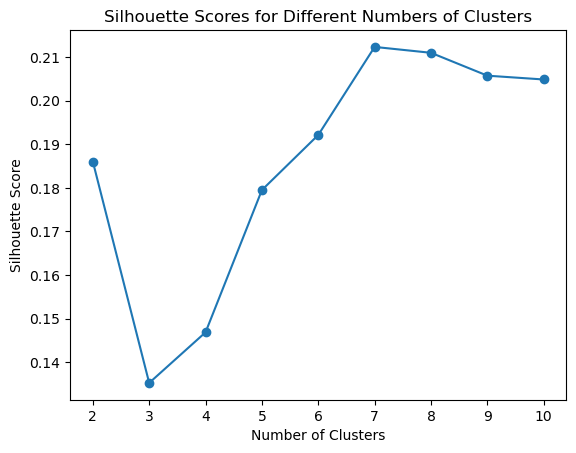

In [23]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_ind)
    silhouette_avg = silhouette_score(df_ind, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}')

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [25]:
# Let's fit number of optimal clusters
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_sca)

# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_

In [26]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Cluster
1,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,2
2,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
3,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,2
4,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
5,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,2


In [44]:
cols = list(df.columns)
cols.remove('Cluster')

In [46]:
cluster_summary = df.groupby(by='Cluster')[cols].mean()
cluster_summary

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
Cluster,,,,,,,,,,,,
0,0.848214,0.196429,49.038691,4.007474,0.049020,153.013518,0.767857,0.008929,1.089286,203.723214,0.776786,7.651786
1,0.835417,0.112500,28.372396,2.663821,0.061396,132.032883,0.122917,0.000000,0.458333,33.585417,1.000000,5.210417
2,0.895425,0.189542,36.735839,4.442523,0.057915,207.514923,0.924837,0.000000,1.928105,41.882353,0.970588,10.065359
3,0.000000,4.355556,34.274074,3.261633,0.000428,0.000000,0.344444,0.033333,1.033333,51.933333,0.877778,11.111111
4,1.000000,0.112676,29.780516,3.456783,0.352588,949.237549,0.436620,0.014085,0.830986,40.295775,0.901408,6.253521
5,0.689655,0.247126,29.335249,2.704354,0.053834,117.098419,0.270115,0.000000,0.724138,44.580460,0.000000,4.270115
6,0.720930,0.290698,36.656007,3.982694,0.041115,143.097922,0.511628,1.000000,1.174419,68.046512,0.825581,7.023256


In [49]:
df.selfemp.value_counts()

selfemp
0    1228
1      91
Name: count, dtype: int64

In [51]:
df.owner.value_counts()

owner
0    738
1    581
Name: count, dtype: int64

## Cluster Insights

-------------------------